# ICE8---Social Network Analysis

## Basic terms

* Node/Vertex:  Entities in the network, and can hold self-properties (such as weight, size, position and any other attribute)
* Edge/Link/Tie/Arc: Connections between the nodes, and might hold properties as well (such as weight representing the strength of the connection, direction in case of asymmetric relation or time if applicable)
* Graph/network: A collection of vertices (or nodes) and edges (or ties), denoted  g(V,E), where V is the vertex set and E is the edge set.
* Undirected network: Undirected networks have edges that do not have a direction. The edges indicate a two-way relationship (i.e., the relationship is symetric), in that each edge can be traversed in both directions.
* Directed network: Directed networks have edges with direction. The edges indicate a one-way relationship, in that each edge can only be traversed in a single direction.
* Degree: The number of links to other nodes in the network.

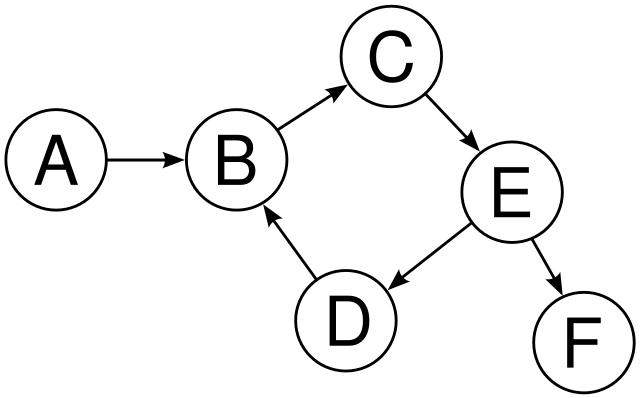

Above is an example of a network. It has 6 nodes and 6 edges, E has 2 out-degree and 1 in-degree.

## Preparation

3 ways to store SNA data: (a) node and edge list, (b) adjacency matrix, and (c) adjacency list

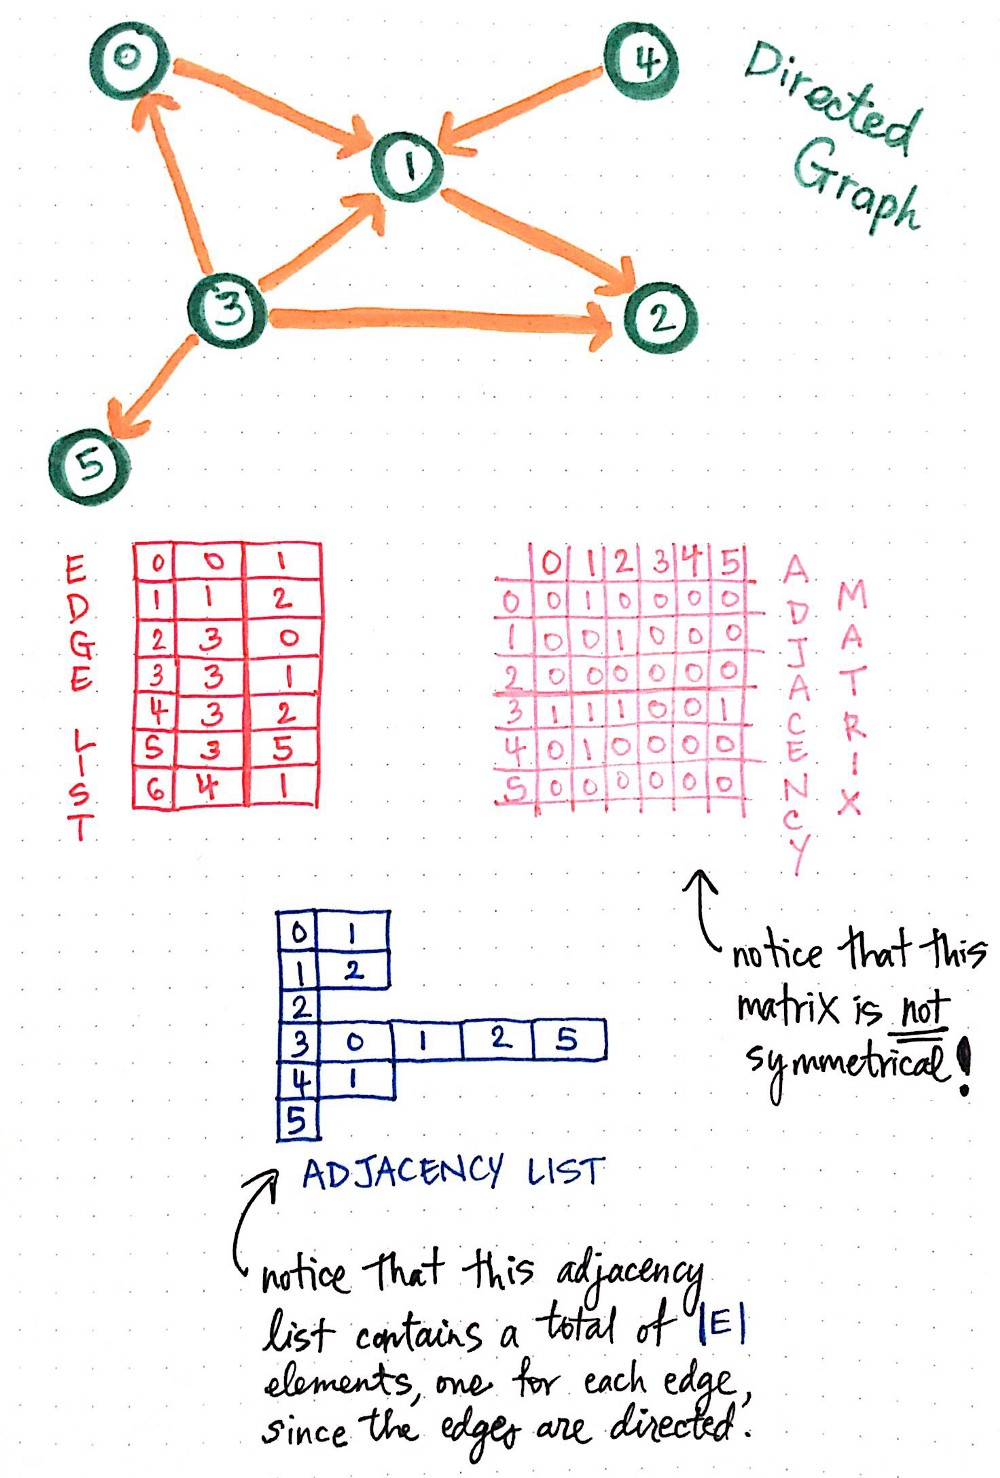

## Visualizing Data from Our Class with Python

In [19]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
import os
os.chdir('C:/Users/gusiy/Desktop/HUDK4050EDM')
SNAdata = pd.read_csv("ICE8_Data.csv", index_col = 0)
G = nx.Graph(SNAdata)

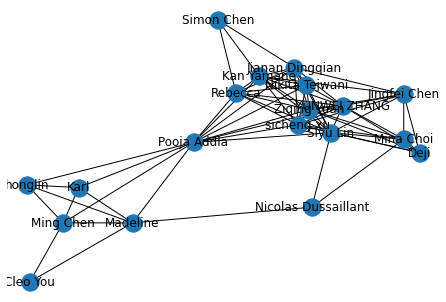

In [21]:
nx.draw(G, with_labels = True)

### Statistics

#### Density

Density is a  is a measure of how complete the graph is (how many edges are present in the network as compared to the total possible number of edges).

In [22]:
density = nx.density(G)

print('The edge density is: %.3f' % (density)) ### Using a format for the output decimal places. 
### guide:https://www.geeksforgeeks.org/python-output-formatting/

The edge density is: 0.415


The value indicates that this network is quite well-connected because we can see more than 40% links among all possible links.

#### Degree Centrality

 This is a common centrality measure, which gives an idea of how 'imporant' each node is in the network. The assumption is that nodes with the most edges are the most important/central as they are directly connected to lots of other nodes. Nodes with a high centrality might be expected to play important roles in network.

And the in-degree centrality and out-degree centrality respectively with in_degree_centrality() and out_degree_centrality().

In [23]:
degree = nx.degree(G)
degree

DegreeView({'Nicolas Dussaillant': 3, 'Ming Chen': 5, 'Rebecca': 9, 'Nikita Tejwani': 8, 'Simon Chen': 3, 'Pooja Addla': 12, 'honglin': 4, 'Karl': 4, 'sicheng xu': 11, 'Jianan Dingqian': 10, 'Siyu Lin': 12, 'Ziqing Yuan': 11, 'Jingfei Chen': 8, 'Mina Choi': 7, 'Cleo You': 2, 'Deji': 6, 'Kan Yamane': 10, 'YUNWEI ZHANG': 11, 'Madeline': 6})

Convert it into a pandas dataframe with from_dict() is an easy way to visualize the dictionary.

In [24]:
pd.DataFrame(degree)

,0,1
0,Nicolas Dussaillant,3
1,Ming Chen,5
2,Rebecca,9
3,Nikita Tejwani,8
4,Simon Chen,3
5,Pooja Addla,12
6,honglin,4
7,Karl,4
8,sicheng xu,11
9,Jianan Dingqian,10


#### Closeness centrality

Closeness centrality measures "how quickly" a node can travel to the rest of the graph.

In [25]:
close = nx.closeness_centrality(G)
pd.DataFrame.from_dict(close, orient = 'index')

,0
Nicolas Dussaillant,0.529412
Ming Chen,0.514286
Rebecca,0.642857
Nikita Tejwani,0.620690
Simon Chen,0.428571
Pooja Addla,0.750000
honglin,0.500000
Karl,0.500000
sicheng xu,0.692308
Jianan Dingqian,0.666667


#### Betweenness centrality

Betweenness centrality is a way of detecting the amount of influence a node has over the flow of information in a graph.

In [26]:
between = nx.betweenness_centrality(G)
pd.DataFrame.from_dict(between, orient = 'index')

,0
Nicolas Dussaillant,0.028494
Ming Chen,0.043542
Rebecca,0.029879
Nikita Tejwani,0.000000
Simon Chen,0.000000
Pooja Addla,0.363663
honglin,0.000000
Karl,0.000000
sicheng xu,0.037340
Jianan Dingqian,0.042367


#### Community detection

This is similar to similar to clustering algorithm. In a social network this is the idea that a large network can be broken down into smaller communinities/cliques. For example, if the network represents the social relationships of all the students at a school, a community/clique would be a friendship group.

In [27]:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities

c = list(greedy_modularity_communities(G))

print(len(c))

2


I don't know why but my function get 2 clusters rather than 3.

In [28]:
#Check these 2 clusters
community_0 = sorted(c[0])
community_1 = sorted(c[1])

print(community_0)
print(community_1)

['Deji', 'Jianan Dingqian', 'Jingfei Chen', 'Kan Yamane', 'Mina Choi', 'Nicolas Dussaillant', 'Nikita Tejwani', 'Rebecca', 'Simon Chen', 'Siyu Lin', 'YUNWEI ZHANG', 'Ziqing Yuan', 'sicheng xu']
['Cleo You', 'Karl', 'Madeline', 'Ming Chen', 'Pooja Addla', 'honglin']


how to print out the results briefly with nx.draw(), and plt.show() to supress the networkx outputs.

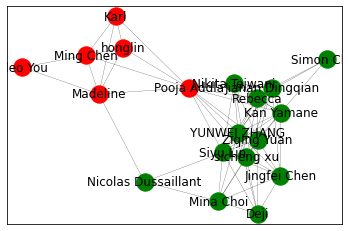

In [29]:
# Set seed (optional)
np.random.seed(123)

# Obtain the positions of the nodes
pos = nx.spring_layout(G)

# Print out all the nodes with color
nx.draw_networkx_nodes(G, pos = pos, nodelist=community_0, node_color='green', label = True)
nx.draw_networkx_nodes(G, pos = pos, nodelist=community_1, node_color='red', label = True)

# Print out the edges
nx.draw_networkx_edges(G, pos = pos, width = 0.2)

# Make sure the label is printed
nx.draw_networkx_labels(G, pos=pos)

# Show the plot so it supress the other networkx outputs
plt.show()

### Beautify our network

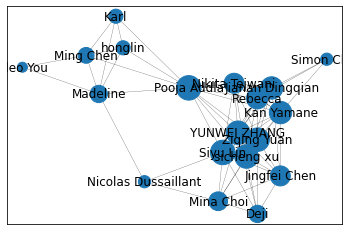

In [30]:
nx.draw_networkx_nodes(G, pos = pos, nodelist = dict(degree).keys(), node_size = [v * 50 for v in dict(degree).values()], label = True)
nx.draw_networkx_edges(G, pos = pos, width = 0.2)
nx.draw_networkx_labels(G, pos=pos)
plt.show()